# Learning From Data : First Coding Assessment

## data
- source: https://www.kaggle.com/datasets/willianoliveiragibin/bank-churn-prediction


## about
In the synthetic dataset for the Playground Series S4 E1 Binary Classification with a Bank Churn Dataset, various features have been engineered to capture relevant information about customers. 
- The dataset includes label-encoded surnames and features derived from them using the TFIDF vectorizer. 
- The credit score serves as a numerical representation of a customer's creditworthiness.
- Geography feature indicates the country of residence, with one-hot encoding for France, Spain, and Germany.
- Gender is represented with one-hot encoding for male and female categories.
- Age, tenure, balance, and the number of products used by the customer offer insights into their banking behavior.
- The presence of a credit card, active membership status, and estimated salary are also included as binary features.
- Notable engineered features provide additional insights. 
- Mem__no__Products is the product of the number of products and active membership status, offering a combined metric. 
- Cred_Bal_Sal represents the ratio of the product of credit score and balance to estimated salary, providing a relative measure of financial health. 
- The balance-to-salary ratio (Bal_sal) and the tenure-to-age ratio (Tenure_Age) offer further dimensions for analysis. 
- Finally, Age_Tenure_product is a feature capturing the interaction between age and tenure.
- The target variable, 'Exited,' indicates whether a customer has churned, with a value of 1 for churned customers and 0 for those who have not. 

This dataset, with its diverse set of features and engineered metrics, provides a comprehensive foundation for binary classification tasks, enabling the exploration of factors influencing customer churn in the banking domain. 
Analysts and data scientists can leverage these features to build predictive models and gain insights into the dynamics of customer retention.

# Use of Github (Show the github link)

- https://github.com/kibambe-0167/lrd-first 


# Data Loading

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(18)
np.random.seed(18)
sns.set_theme(style="darkgrid") # for theme | "darkgrid", "whitegrid", "dark", "white", "ticks"
pd.set_option('display.max_columns', 25)

In [2]:
all_dataset = "./data/bank_churn.csv"
small_dataset = "./data/bank_churn_small.csv" # for testing
# 
df = pd.read_csv(all_dataset, low_memory=False)
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


In [3]:
# df.tail()
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,"-4.763,76","114.119,45","1.165.557,26","-1.177.944,59","-4.259.289,45",1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,"-15.103,70","68.546,18","46.744,02","-583.449,86","-419.871,58",1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,"-15.103,70","68.546,18","46.744,02","-583.449,86","-419.871,58",1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,"83.065.226.551,40","9.769.052.344.005.960,00","16.065.539.886.799,00","-7.042.490.682.870.180,00","18.834.370.862.998,00",1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0


# Data Cleaning

In [4]:
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


In [5]:
df.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

### Drop columns that are not useful for data visualisation | analysis surnames

In [6]:
df.drop(
  columns=['Surname', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4'], inplace= True, axis=1
)
print(df.columns.shape)
df.head()

(19,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


### Put geography features into a single feature for easy usage | to categorical

- put the geography location of the samples into a single feature column. 
- france: 1 .. germany: 2 .. spain: 3 .. unknown/not clear: 4

##### why
- better computational usage, as compared to one-hot encoded
- curse of dimensionality
- avoid to many zeros: to reduce memory usage with many zeros.
- data is more than 150K
- what i'm about to do[sparse] might bring more computational overhead as compared one-hot encoded.
- easy to manage less number of features for visualisations and relationship between features

In [7]:
a = np.array(df['France'].values)
b = np.array(df['Germany'].values)
c = np.array(df['Spain'].values)

d = []
for i in range(len(a)):
  if a[i] == 1 and b[i] != 1 and c[i] != 1: d.append(1) # france
  elif b[i] == 1 and a[i] != 1 and c[i] != 1 : d.append(2) # germany
  elif c[i] == 1 and b[i] != 1 and a[i] != 1: d.append(3) # spain
  else: d.append(4) # for unknown
  
# add the new feature column back to the dataset
df['Country'] = np.array(d)
# 
# 
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0,1
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0,1
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0,1
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0,1
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0,1


### Make male and features features into a single feature for easy usage | to categorical

- make the female and male features, into a single sparse feature called [gender]. 
- female: 1 .. male: 0

In [8]:
a = np.array(df['Female'].values)
b = np.array(df['Male'].values)

d = []
for i in range(len(a)):
  if a[i] == 1 and b[i] != 1: d.append(1) # female
  elif b[i] == 1 and a[i] != 1: d.append(0) # male
  else: d.append(3) # for unknown
  
# add the new feature column back to the dataset
df['Gender'] = np.array(d)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country,Gender
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1,0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1,0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0,1,0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1,0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0,1,0
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0,1,1
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0,1,0
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0,1,0


### remove columns turned into sparse fron one-hot encoded
France .. Germany .. Spain .. Female .. male

In [9]:
df.drop(columns=['France', 'Germany', 'Spain', 'Female', 'Male'], inplace=True, axis=1)
print(f"number of columns: {df.columns.shape}")
df

number of columns: (16,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country,Gender
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1,0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1,0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0.0,0.0,0.0,0.25,400.0,1,0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1,0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0,1,0
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0,1,1
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0,1,0
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0,1,0


### fix columns that have data type of "objects" to float/int/categorical

In [10]:
df.dtypes

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary        object
Exited                  int64
Mem__no__Products     float64
Cred_Bal_Sal           object
Bal_sal                object
Tenure_Age             object
Age_Tenure_product    float64
Country                 int64
Gender                  int64
dtype: object

In [11]:
# a = "10.229.405.812.711.500,00".replace(".", '').replace(",",'.')
# a, float(a)

In [12]:
def dtype_objects_float(x):
  """change dtype of data from object to float for manipulation"""
  return float(str(x).replace(".", "").replace(",", "."))

df["CreditBalanceSalary"] = df["Cred_Bal_Sal"].apply(lambda x: dtype_objects_float(x))
df["BalanceSalary"] = df["Bal_sal"].apply(lambda x: dtype_objects_float(x))
df["TenureAge"] = df["Tenure_Age"].apply(lambda x: dtype_objects_float(x))
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1,0,0.000000e+00,0.000000e+00,9.090909e+15
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1,0,0.000000e+00,0.000000e+00,3.030303e+16
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0.0,0.0,0.0,0.25,400.0,1,0,0.000000e+00,0.000000e+00,2.500000e+01
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1,0,1.022941e+16,1.760655e+16,5.882353e+16
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3,0,0.000000e+00,0.000000e+00,1.515152e+16


In [13]:
#  Drop columns we changed data type from object float
# 
df.drop(columns=['Cred_Bal_Sal','Bal_sal','Tenure_Age'], inplace=True, axis=1)

In [14]:
print(df.shape)
df.dtypes

(175028, 16)


CreditScore            float64
Age                    float64
Tenure                 float64
Balance                float64
NumOfProducts          float64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary         object
Exited                   int64
Mem__no__Products      float64
Age_Tenure_product     float64
Country                  int64
Gender                   int64
CreditBalanceSalary    float64
BalanceSalary          float64
TenureAge              float64
dtype: object

### Normalise column/feature names

In [15]:
df.rename(columns={"Mem__no__Products": "MemberNoProducts", "Age_Tenure_product": 'AgeTenureProduct'}, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0.0,99.0,1,0,0.000000e+00,0.000000e+00,9.090909e+15
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,2.0,33.0,1,0,0.000000e+00,0.000000e+00,3.030303e+16
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0.0,400.0,1,0,0.000000e+00,0.000000e+00,2.500000e+01
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1.0,68.0,1,0,1.022941e+16,1.760655e+16,5.882353e+16
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,2.0,165.0,3,0,0.000000e+00,0.000000e+00,1.515152e+16


### Missing values and duplicates values | no values

In [16]:
# check for null value
df.isnull().sum().sum()

0

In [17]:
# check for na values
df.isna().sum().sum()

0

In [18]:
# df.isnull()

In [19]:
# plt.figure(figsize=(6, 4))
# sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
# plt.title('Missing Values Heatmap')
# plt.show()

In [20]:
# number of duplicates samples
df.duplicated().sum()

569

In [21]:
print(f"Before dropping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"number of duplicates: {df.duplicated().sum()}")
print(f"After dropping duplicates: {df.shape}")

Before dropping duplicates: (175028, 16)
number of duplicates: 0
After dropping duplicates: (174459, 16)


# Data Visualisation | Features Relationship / Correlation

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0.0,99.0,1,0,0.000000e+00,0.000000e+00,9.090909e+15
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,2.0,33.0,1,0,0.000000e+00,0.000000e+00,3.030303e+16
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0.0,400.0,1,0,0.000000e+00,0.000000e+00,2.500000e+01
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1.0,68.0,1,0,1.022941e+16,1.760655e+16,5.882353e+16
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,2.0,165.0,3,0,0.000000e+00,0.000000e+00,1.515152e+16


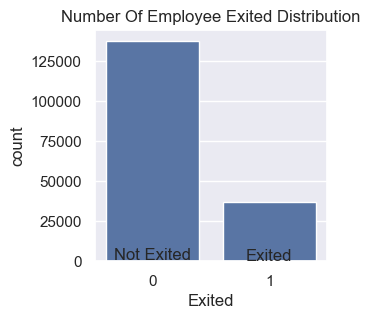

In [23]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x="Exited")
# 
plt.text(0, 1000, 'Not Exited', fontsize=12, ha='center')
plt.text(1, 500, 'Exited', fontsize=12, ha='center')
plt.title("Number Of Employee Exited Distribution")
plt.show()

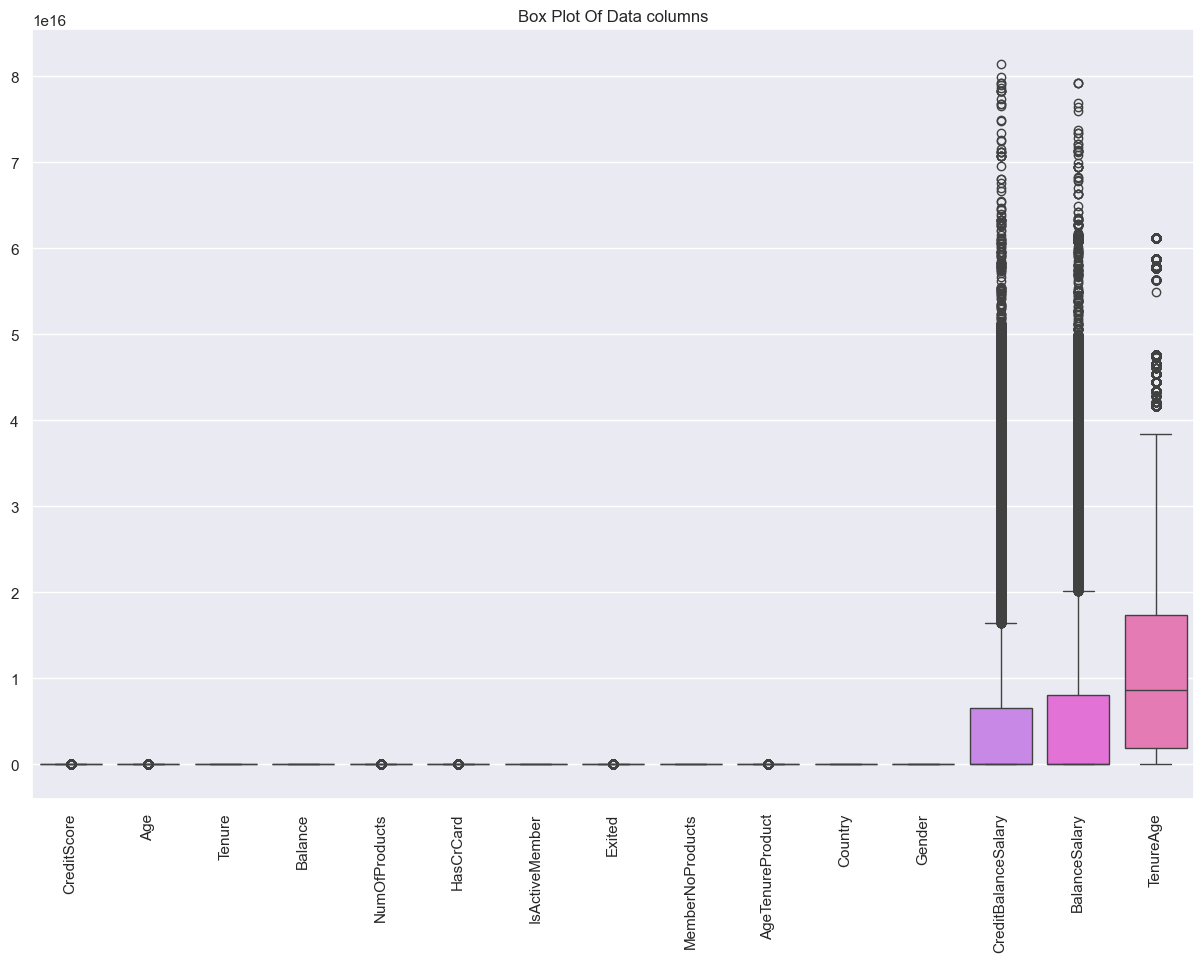

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plot Of Data columns")
plt.xticks(rotation=90)
# plt.xlabel("columns",rotation=90)
plt.show()

# Regresion Analysis

# Linear Regression

# Reflection of the data

# What i learn and whati can do better for next

# Reflections on your learnings between this assignment and the previous one. 

- What was different between Python and Excel? When will you use either of them?
- If you could do this assignment over what would you do differently?
- What are the gaps in your programming or stats knowledge? (350 words)

# Challenge To Find Issues and Earn Some Point

train a model from the cleaned data

In [25]:
# model training